In [1]:
import sys
sys.path.append("../../../src")

from mask_dataset import MaskedDataset
dataset = MaskedDataset(model_name='mbert')

Load pre-saved file /home/xzhao/workspace/probing-mulitlingual/result/dataset-mbert/mlama-dataset.pkl for MaskedDataset instance


In [2]:
from pred_evaluation import get_full_match_matrix_by_uuid, get_partial_match_matrix_by_uuid, calculate_overall_p1_score_standard, calculate_overall_p1_score_from_match_matrix
full_lang2p1_mbert = calculate_overall_p1_score_standard(dataset)
langs, all_uuids, mbert_full_matrix = get_full_match_matrix_by_uuid(dataset)
langs, all_uuids, mbert_partial_matrix = get_partial_match_matrix_by_uuid(dataset)
partial_lang2p1_mbert = calculate_overall_p1_score_from_match_matrix(mbert_partial_matrix, langs, dataset)

In [3]:
dataset = MaskedDataset(model_name='xlmr')
full_lang2p1_xlmr = calculate_overall_p1_score_standard(dataset)
langs, all_uuids, xlmr_full_matrix = get_full_match_matrix_by_uuid(dataset)
langs, all_uuids, xlmr_partial_matrix = get_partial_match_matrix_by_uuid(dataset)
partial_lang2p1_xlmr = calculate_overall_p1_score_from_match_matrix(xlmr_partial_matrix, langs, dataset)

Load pre-saved file /home/xzhao/workspace/probing-mulitlingual/result/dataset-xlmr/mlama-dataset.pkl for MaskedDataset instance


In [4]:
for idx, uuid in enumerate(all_uuids):
    if idx < 500:
        continue
    if idx > 1000:
        break
    if xlmr_partial_matrix[langs.index('en')][idx] == 1 and xlmr_full_matrix[langs.index('en')][idx] == 0:
        print(uuid, dataset.display_uuid(uuid), dataset.uuid_info_plain[uuid]['rel_uri'])
    

042d70df-2361-4d61-b361-ec89ca711152 Kristian Geelmuyden was born in Oslo . place_of_birth
04469a93-3ed4-45fe-af4d-d8d11ade8572 social psychology is part of psychology . P361
04984f33-32ef-403a-9fba-e59a64427a9f Sega Sports R&D is owned by Sega . P127
049c8c3c-b98d-4326-9817-70ee970f7210 Petr Kroutil was born in Prague . place_of_birth
04b2f2cf-6fe1-499a-8917-2b9bfc59949e Hotel Vancouver is named after Vancouver . P138
04c744f8-fd85-442d-a56b-39833a492895 galactic halo is part of galaxy . P361
0514adb3-0165-4bf8-849e-d7f5d29a292b The native language of Lannick Gautry is French . P103
056e827a-b10e-4e87-b43f-fec2e854c45c Ernest Breton was born in Paris . place_of_birth
05780c83-c172-40f4-b51a-c2f4db99c49d Abdolkarim Soroush is affiliated with the Islam religion . P140
063d04d8-f12e-4ba5-84f4-02ddfe8fd146 Takeshi Maeda was born in Tokyo . place_of_birth
0695d095-0e6d-4ef8-a6ea-bedae94f6f4c Hind bint Utbah is affiliated with the Islam religion . P140
06d9cc25-121d-437b-bdae-e919061a4737 L

In [5]:
from constants import PREDICTION_ROOT
from pred_evaluation import read_pred
df = read_pred('en', 'P127', PREDICTION_ROOT[dataset.model_name])
df[df['uuid']=="04984f33-32ef-403a-9fba-e59a64427a9f"]

,id,sent,mask_num,prediction,uuid,obj,sub,obj_uri,sub_uri,pred_ids
81,25604,Sega Sports R&D is owned by <mask> .,1,[['▁Nintendo']],04984f33-32ef-403a-9fba-e59a64427a9f,Sega,Sega Sports R&D,Q122741,Q24188,[[70616]]
81,25604,Sega Sports R&D is owned by <mask> <mask> .,2,"[['▁Se'], ['▁Corporation']]",04984f33-32ef-403a-9fba-e59a64427a9f,Sega,Sega Sports R&D,Q122741,Q24188,"[[503], [84829]]"
81,25604,Sega Sports R&D is owned by <mask> <mask> <mas...,3,"[['▁Se'], ['ga'], ['▁Corporation']]",04984f33-32ef-403a-9fba-e59a64427a9f,Sega,Sega Sports R&D,Q122741,Q24188,"[[503], [208], [84829]]"
81,25604,Sega Sports R&D is owned by <mask> <mask> <mas...,4,"[['▁Se'], ['ga'], ['▁Entertainment'], ['▁Limit...",04984f33-32ef-403a-9fba-e59a64427a9f,Sega,Sega Sports R&D,Q122741,Q24188,"[[503], [208], [58815], [80433]]"
81,25604,Sega Sports R&D is owned by <mask> <mask> <mas...,5,"[['▁Se'], ['ga'], ['▁Sports'], ['▁Inc'], ['▁Li...",04984f33-32ef-403a-9fba-e59a64427a9f,Sega,Sega Sports R&D,Q122741,Q24188,"[[503], [208], [39170], [8942], [80433]]"
81,25604,Sega Sports R&D is owned by <mask> <mask> <mas...,6,"[['▁Se'], ['ga'], ['▁Sports'], [','], ['▁Inc']...",04984f33-32ef-403a-9fba-e59a64427a9f,Sega,Sega Sports R&D,Q122741,Q24188,"[[503], [208], [39170], [4], [8942], [80433]]"


In [12]:
accuracy1 = [] # full p1
accuracy2 = [] # partial p1
accuracy3 = [] # full p1
accuracy4 = [] # partial p1

languages = []
for lang in full_lang2p1_mbert:
    languages.append(dataset.display_lang(lang, prefix=False))
    accuracy1.append(full_lang2p1_mbert[lang] * 100)
    accuracy2.append(partial_lang2p1_mbert[lang] * 100)
    accuracy3.append(full_lang2p1_xlmr[lang] * 100)
    accuracy4.append(partial_lang2p1_xlmr[lang] * 100)
    

In [13]:
print(len(accuracy1))
print(len(accuracy2))
print(len(accuracy3))
print(len(accuracy4))

53
53
53
53


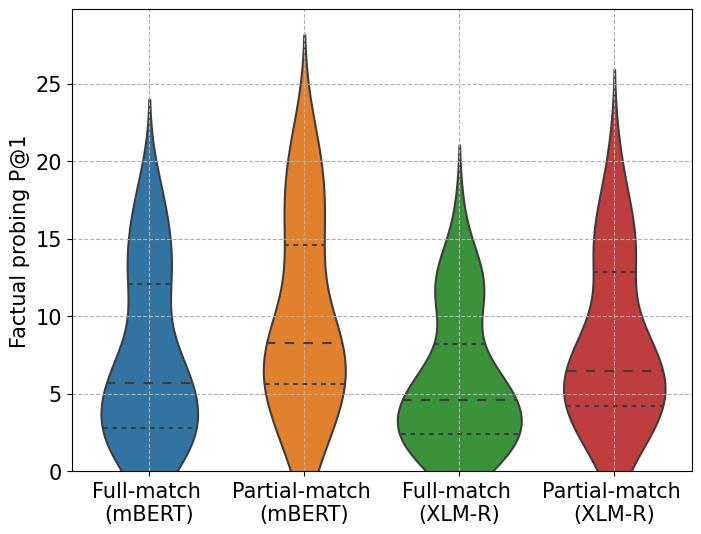

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True

# Convert your data to a pandas DataFrame for easier manipulation
df = pd.DataFrame({
    'Factual probing P@1': accuracy1 + accuracy2 + accuracy3 + accuracy4,
    'Matching methods': ['Full-match \n(mBERT)']*len(accuracy1) + ['Partial-match \n(mBERT)']*len(accuracy2) + 
                        ['Full-match \n(XLM-R)']*len(accuracy3) + ['Partial-match \n(XLM-R)']*len(accuracy4)
})

# Create a violin plot
plt.figure(figsize=(8, 6))

ax = sns.violinplot(y='Factual probing P@1', x='Matching methods', data=df, inner="quartile")
ax.set_xlabel('')
ax.set(ylim=(0))
ax.set_ylabel('Factual probing P@1', fontsize=15)
ax.tick_params(axis='both', labelsize=15)
ax.grid(True, linestyle='--')
plt.savefig("../../display/figures/p1score_vs.updated.eps", format="eps", bbox_inches="tight", pad_inches=0.1)
# plt.savefig("../../../figures/p1score_vs.transparent.svg", bbox_inches="tight", pad_inches=0.1, transparent=True)